
## Conv1d 함수 설명


Conv1d는 1차원 신호에 대한 합성곱(컨볼루션) 연산을 수행하는 PyTorch 레이어입니다. 이 연산은 신호 처리, 시계열 분석, 자연어 처리 등 다양한 분야에서 사용됩니다.


### 수학적 정의:

1. **출력 크기 계산 공식**:
$L_{out} = \lfloor\frac{L_{in} + 2 \times padding - dilation \times (kernel\_size - 1) - 1}{stride} + 1\rfloor$



2. **컨볼루션 연산 공식**:
   $out(N_i, C_{out_j}) = bias(C_{out_j}) + \sum_{k=0}^{C_{in}-1} weight(C_{out_j}, k) \star input(N_i, k)$




   여기서:

<think>
사용자가 두 가지 요청을 했습니다:
1. 수식 포함하기
2. plt에서 한국어가 제대로 인식되도록 설정하기

먼저 plt(matplotlib)에서 한국어가 정상적으로 표시되도록 하는 코드를 수정해야 합니다. 이전에 'Malgun Gothic'을 설정했지만, 추가적인 설정이 필요할 수 있습니다.



다음으로, Conv1d에 관한 수식을 추가해야 합니다. Conv1d의 핵심 수식은 다음과 같습니다:

1. 출력 크기 계산 공식:
   L_out = ⌊(L_in + 2 × padding - dilation × (kernel_size - 1) - 1) / stride + 1⌋

2. 컨볼루션 연산 공식:
   out(N_i, C_out_j) = bias(C_out_j) + Σ(k=0 to C_in-1) weight(C_out_j, k) ⋆ input(N_i, k)
   여기서 ⋆는 컨볼루션 연산을 의미합니다.

이 정보를 바탕으로 코드와 설명을 업데이트하겠습니다.
</think>



   여기서:
   - $N_i$: 배치 인덱스
   - $C_{out_j}$: 출력 채널 인덱스
   - $C_{in}$: 입력 채널 수
   - $\star$: 유효 교차 상관 연산자

### 주요 매개변수:

1. **in_channels**: 입력 채널 수
2. **out_channels**: 출력 채널 수
3. **kernel_size**: 컨볼루션 커널의 크기
4. **stride**: 컨볼루션 윈도우의 이동 간격
5. **padding**: 입력 신호의 양쪽에 추가되는 패딩 크기
6. **dilation**: 커널 요소 간의 간격
7. **groups**: 입력과 출력 채널 간의 연결 블록 수
8. **bias**: 편향 사용 여부

위 코드에서 제공하는 시각화는 이러한 매개변수가 컨볼루션 결과에 미치는 영향을 이해하는 데 도움이 됩니다. 특히 애니메이션은 컨볼루션 윈도우가 신호를 따라 어떻게 이동하며 출력값을 계산하는지 단계별로 보여줍니다.


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
os.environ['CUDA_LAUNCH_BLOCKING']='1'
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
# GPU 사용 가능하면 cuda, 아니면 cpu
import torchvision
import torchvision.transforms as transforms
from torch import Tensor
from typing import List, Tuple, Dict, Any, Union


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()


import matplotlib.font_manager as fm
import platform

# 운영체제별 기본 폰트 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'  # 윈도우의 경우 맑은 고딕
elif platform.system() == 'Darwin':  # Mac OS
    font_name = 'AppleGothic'
else:  # Linux 등 기타 OS
    font_name = 'NanumGothic'  # 나눔고딕

# 폰트 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

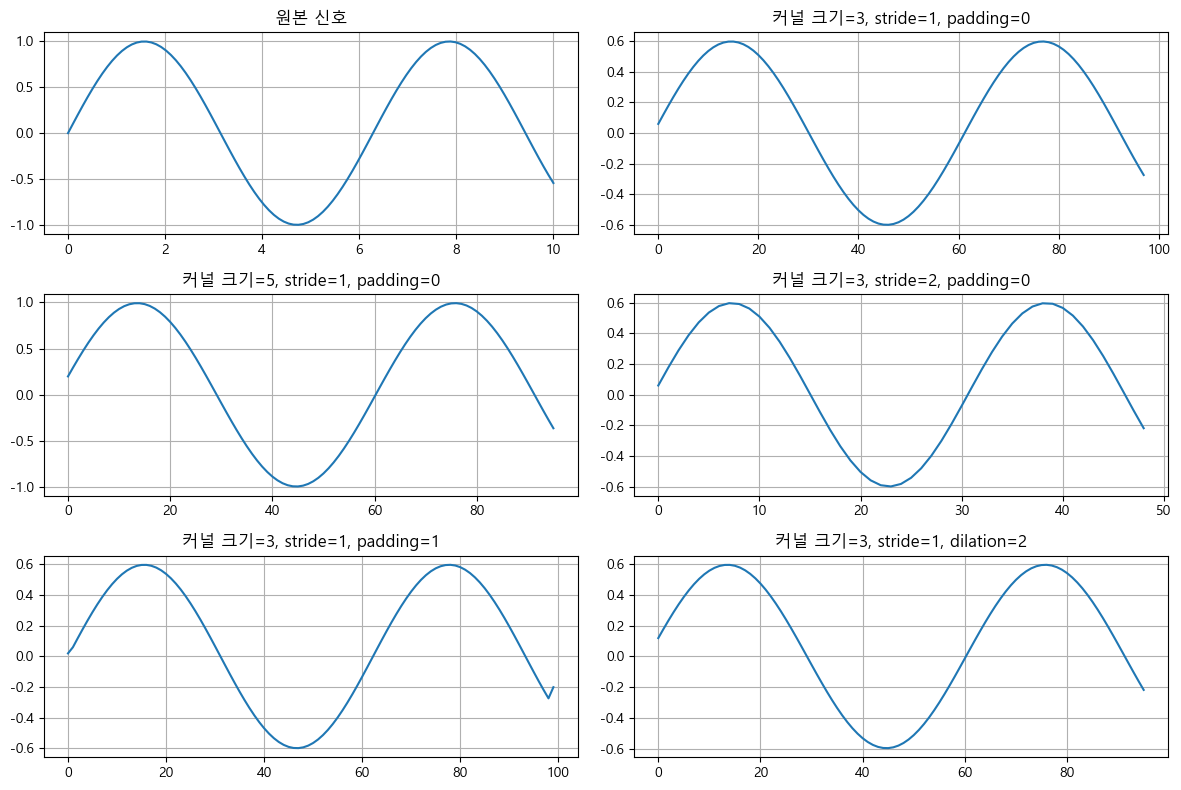

In [2]:
# 1D 신호 생성 (예: 사인파)
x = torch.linspace(0, 10, 100)
signal = torch.sin(x)

# 입력 신호 시각화
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(x.numpy(), signal.numpy())
plt.title('원본 신호')
plt.grid(True)

# Conv1d 필터 정의 (다양한 커널 크기로)
conv1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)
conv2 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=5, stride=1, padding=0)
conv3 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=0)
conv4 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
conv5 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1, dilation=2)

# 필터 가중치 초기화 (시각화를 위해 고정된 값으로 설정)
with torch.no_grad():
    conv1.weight.fill_(0.2)
    conv1.bias.fill_(0)
    conv2.weight.fill_(0.2)
    conv2.bias.fill_(0)
    conv3.weight.fill_(0.2)
    conv3.bias.fill_(0)
    conv4.weight.fill_(0.2)
    conv4.bias.fill_(0)
    conv5.weight.fill_(0.2)
    conv5.bias.fill_(0)

# 입력 신호를 Conv1d에 맞게 reshape
input_signal = signal.view(1, 1, -1)  # (batch_size, channels, length)

# Conv1d 적용 및 결과 시각화
output1 = conv1(input_signal).view(-1).detach()
plt.subplot(3, 2, 2)
plt.plot(output1.numpy())
plt.title('커널 크기=3, stride=1, padding=0')
plt.grid(True)

output2 = conv2(input_signal).view(-1).detach()
plt.subplot(3, 2, 3)
plt.plot(output2.numpy())
plt.title('커널 크기=5, stride=1, padding=0')
plt.grid(True)

output3 = conv3(input_signal).view(-1).detach()
plt.subplot(3, 2, 4)
plt.plot(output3.numpy())
plt.title('커널 크기=3, stride=2, padding=0')
plt.grid(True)

output4 = conv4(input_signal).view(-1).detach()
plt.subplot(3, 2, 5)
plt.plot(output4.numpy())
plt.title('커널 크기=3, stride=1, padding=1')
plt.grid(True)

output5 = conv5(input_signal).view(-1).detach()
plt.subplot(3, 2, 6)
plt.plot(output5.numpy())
plt.title('커널 크기=3, stride=1, dilation=2')
plt.grid(True)

plt.tight_layout()
plt.show()

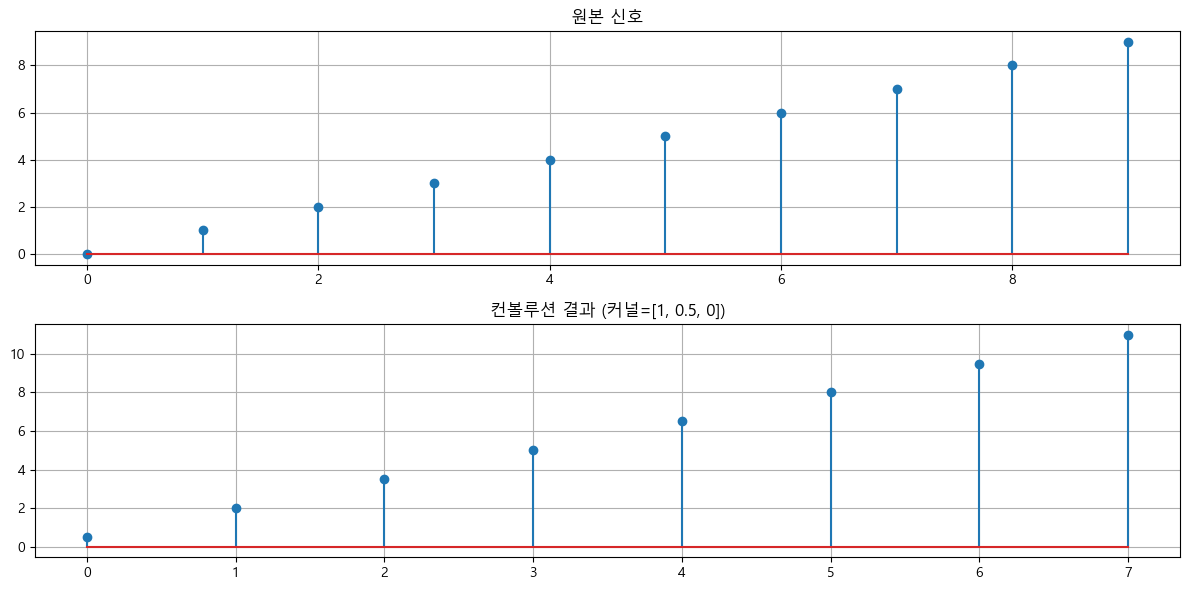

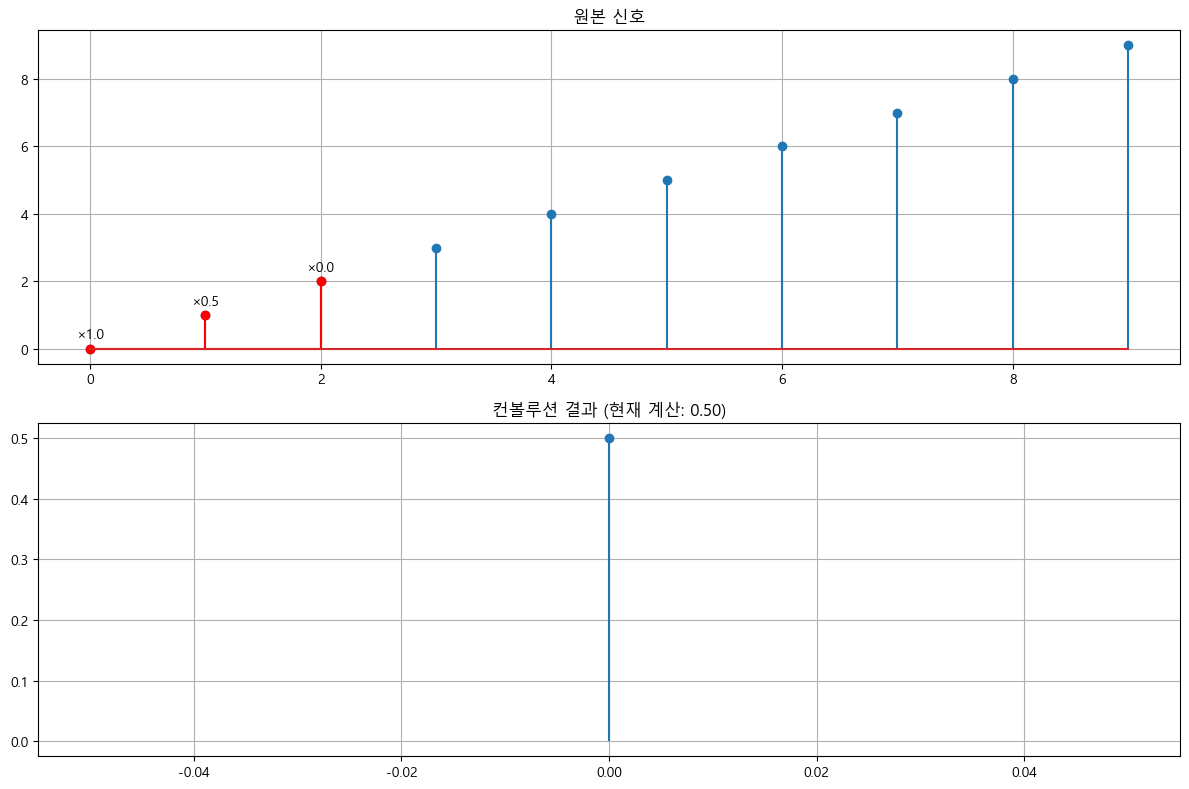

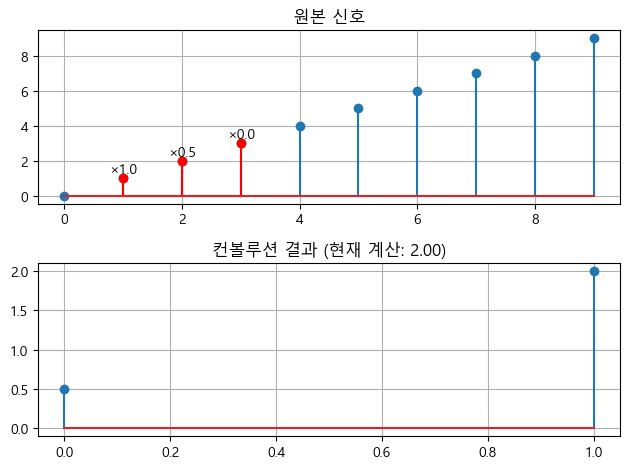

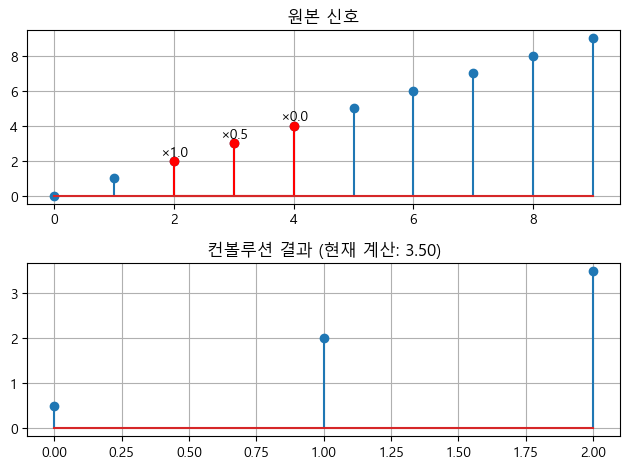

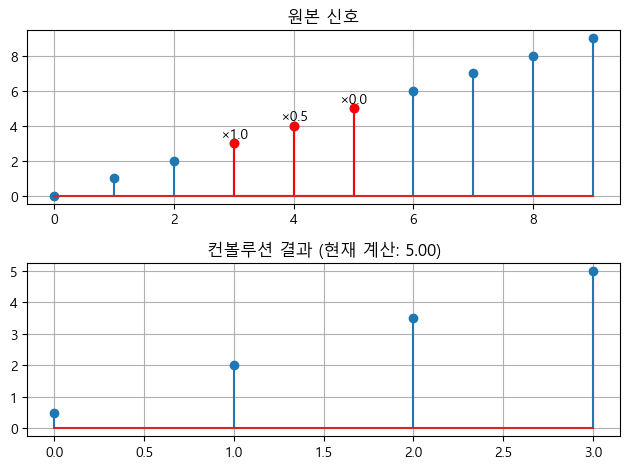

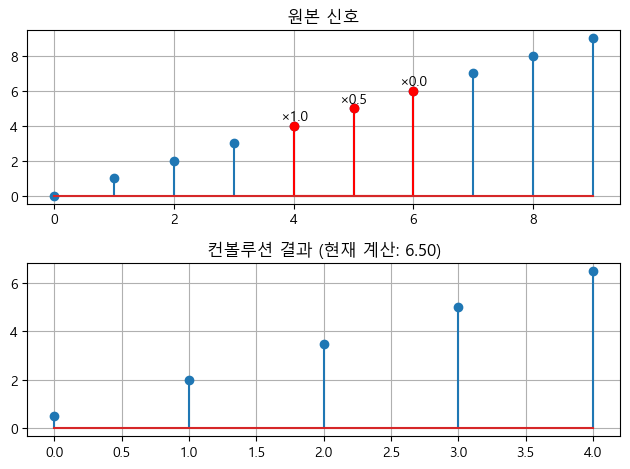

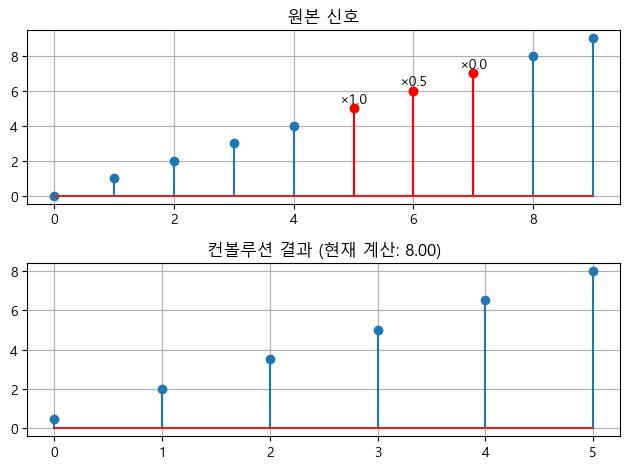

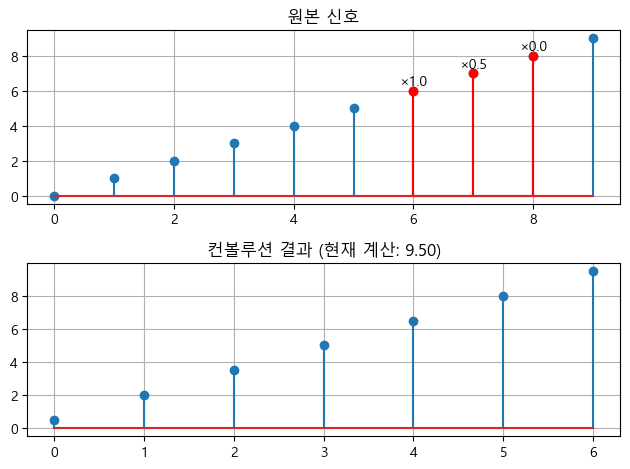

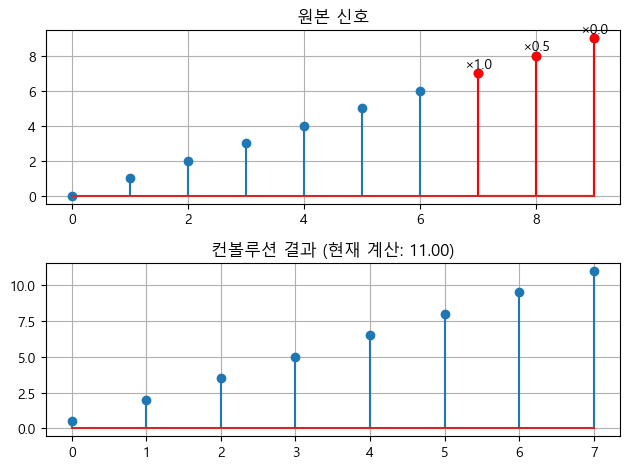

C:\Users\junu\AppData\Local\Temp\ipykernel_81996\2731985112.py:92: UserWarning: Glyph 8902 (\N{STAR OPERATOR}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
d:\.conda\envs\ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8902 (\N{STAR OPERATOR}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


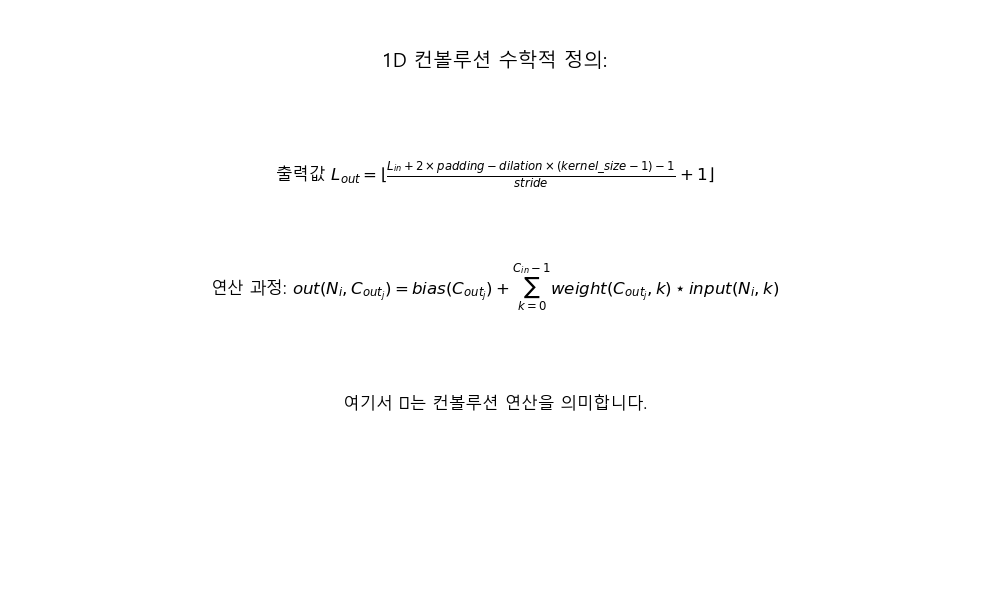

In [3]:
# Conv1d 작동 원리 시각적 설명
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'  # 윈도우의 경우 맑은 고딕
elif platform.system() == 'Darwin':  # Mac OS
    font_name = 'AppleGothic'
else:  # Linux 등 기타 OS
    font_name = 'NanumGothic'  # 나눔고딕

# 폰트 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 간단한 1D 신호 생성
signal = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float).view(1, 1, -1)
kernel_size = 3
stride = 1
padding = 0

# Conv1d 필터 정의 및 가중치 초기화
conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kernel_size, stride=stride, padding=padding)
with torch.no_grad():
    conv.weight = nn.Parameter(torch.tensor([[[1, 0.5, 0]]], dtype=torch.float))  # 간단한 패턴 검출 필터
    conv.bias = nn.Parameter(torch.tensor([0.0]))

# 컨볼루션 적용
output = conv(signal).view(-1).detach()

# 원본 신호와 컨볼루션 결과 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(signal.view(-1).numpy())
plt.title('원본 신호')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(output.numpy())
plt.title('컨볼루션 결과 (커널=[1, 0.5, 0])')
plt.grid(True)

plt.tight_layout()
plt.show()

# 컨볼루션 과정 설명을 위한 애니메이션 (단계별 시각화)
plt.figure(figsize=(12, 8))

for i in range(len(signal.view(-1)) - kernel_size + 1):
    plt.clf()
    plt.subplot(2, 1, 1)
    plt.stem(signal.view(-1).numpy())
    plt.title('원본 신호')
    plt.grid(True)
    
    # 현재 위치의 윈도우 하이라이트
    x_positions = range(i, i + kernel_size)
    window_values = signal.view(-1)[i:i+kernel_size].numpy()
    plt.stem(x_positions, window_values, linefmt='r-', markerfmt='ro')
    
    # 커널 값 표시
    kernel_values = conv.weight.detach().view(-1).numpy()
    for j, pos in enumerate(x_positions):
        plt.text(pos, window_values[j] + 0.3, f'×{kernel_values[j]:.1f}', ha='center')
    
    # 현재 출력 값
    current_output = np.sum(window_values * kernel_values) + conv.bias.item()
    
    plt.subplot(2, 1, 2)
    outputs_so_far = output[:i+1].numpy()
    plt.stem(range(i+1), outputs_so_far)
    plt.title(f'컨볼루션 결과 (현재 계산: {current_output:.2f})')
    plt.grid(True)
    
    plt.tight_layout()
    plt.pause(1)  # 1초 간격으로 표시

plt.show()

# Conv1d 수식 설명
plt.figure(figsize=(10, 6))
plt.text(0.5, 0.9, '1D 컨볼루션 수학적 정의:', fontsize=14, ha='center')
plt.text(0.5, 0.7, r'출력값 $L_{out} = \lfloor\frac{L_{in} + 2 \times padding - dilation \times (kernel\_size - 1) - 1}{stride} + 1\rfloor$', fontsize=12, ha='center')
plt.text(0.5, 0.5, r'연산 과정: $out(N_i, C_{out_j}) = bias(C_{out_j}) + \sum_{k=0}^{C_{in}-1} weight(C_{out_j}, k) \star input(N_i, k)$', fontsize=12, ha='center')
plt.text(0.5, 0.3, '여기서 ⋆(star)는 컨볼루션 연산을 의미합니다.', fontsize=12, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()